<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/pca-insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')

In [4]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [0]:
X = df[['age', 'speed', 'miles']].values

In [0]:
import numpy as np
from sklearn.decomposition import PCA

In [0]:
import matplotlib.pyplot as plt

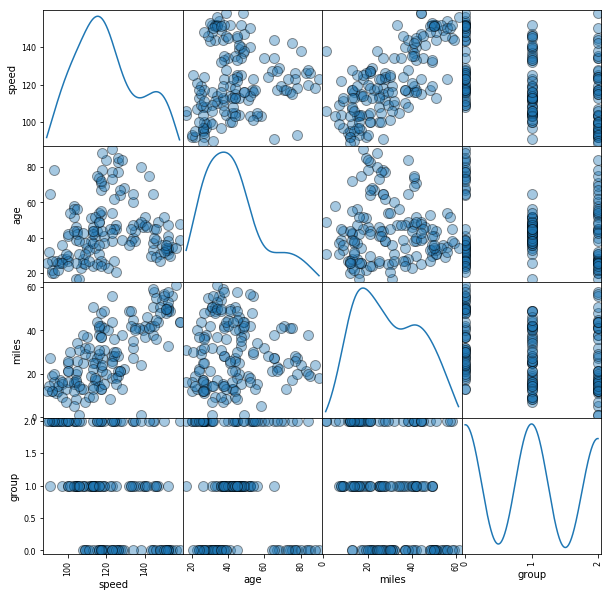

In [8]:
sample_df = df.sample(n=150, random_state=42)
plots = pd.plotting.scatter_matrix(sample_df, 
                           diagonal='kde', 
                           s=100, marker='o', edgecolors='k', alpha=0.4,
                           figsize=(10, 10))

In [9]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_

array([438.89707669, 293.66260097, 103.39083913])

In [11]:
# sum is 1, first pc has a very high variance, i.e. is very good, second could be deleted
pca.explained_variance_ratio_

array([0.52502758, 0.35129185, 0.12368057])

## Lets reduce to two

In [0]:
# PCA?

### Original data, speed/age with new coordinate system

In [15]:
X.shape

(1500, 3)

In [14]:
X_2_dim = X[:, :2]
X_2_dim.shape

(1500, 2)

In [16]:
pca = PCA(n_components=2)
pca.fit(X_2_dim)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_points = pca.transform([[0, 0], [100, 0]])
x_points

array([[-127.09176232,   29.5871207 ],
       [ -72.23485292,  113.19764331]])

In [19]:
y_points = pca.transform([[0, 0], [0, 160]])
y_points

array([[-127.09176232,   29.5871207 ],
       [   6.68507386,  -58.18393434]])

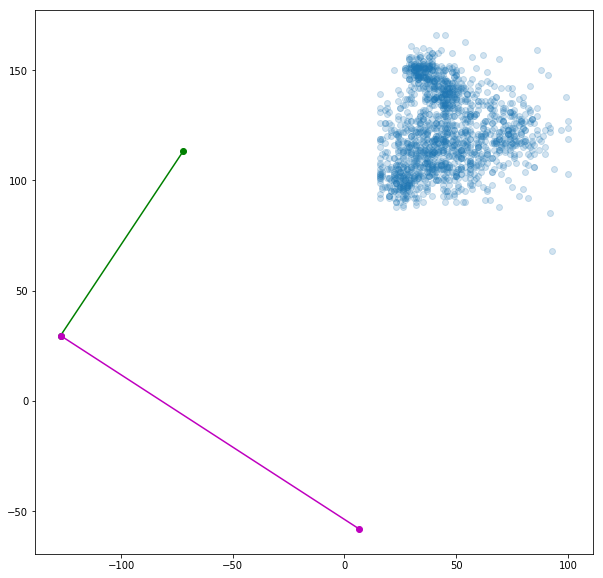

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.plot(x_points.transpose()[0], x_points.transpose()[1], 'go-')
plt.plot(y_points.transpose()[0], y_points.transpose()[1], 'mo-')

In [21]:
X_transformed = pca.transform(X_2_dim)
X_transformed

array([[-21.01641003,  12.61597944],
       [  1.19138544,  10.00564982],
       [-20.02128578,  -9.56531285],
       ...,
       [ 10.78209174, -11.8351    ],
       [-26.4755978 ,   0.64947331],
       [-11.66423226,  23.22431442]])

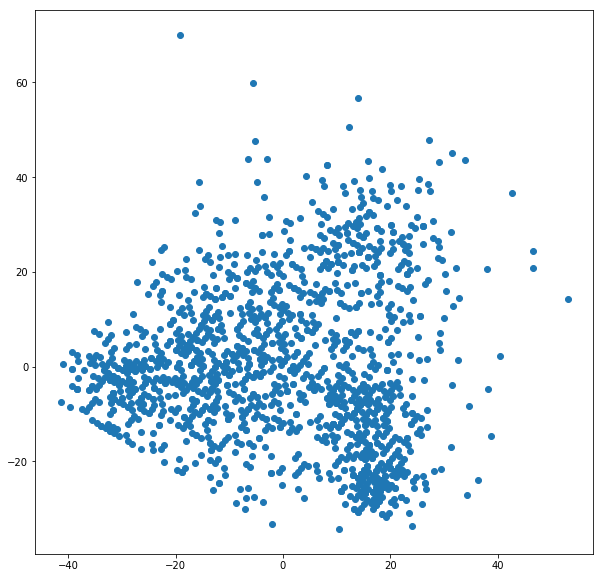

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

# Exercise: Experiment with other dimensionality reductions

1. Stick to PCA
   * Try another set of features as input to PCA
   * Try all 3 features
1. Use UMAP
1. Use T-SNE